In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import Binarizer

In [2]:
df = pd.read_csv('diabetes.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


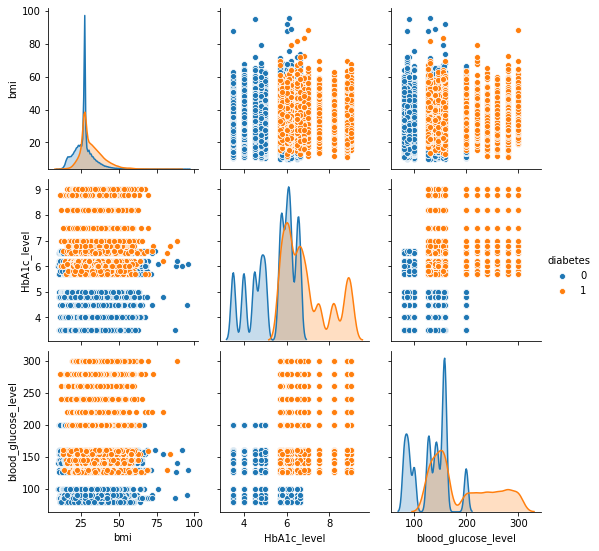

In [4]:
import seaborn as sns
sns.pairplot(df.iloc[:,4:9],hue='diabetes')

In [5]:
#separating target and inputs
x= df.drop(columns='diabetes',axis=1)
y=df['diabetes']

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x.iloc[:,0] = le.fit_transform(x.iloc[:,0].values)
x.iloc[:,4]=le.fit_transform(x.iloc[:,4].values)
x

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,4,27.32,5.7,158
3,0,36.0,0,0,1,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90
99996,0,2.0,0,0,0,17.37,6.5,100
99997,1,66.0,0,0,3,27.83,5.7,155
99998,0,24.0,0,0,4,35.42,4.0,100


In [7]:
#checking for missing values
x.columns[x.isna().any()]

Index([], dtype='object')

In [8]:
#training dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=42)

In [9]:
#Gaussian Naive Bayes
def gaussian_NB(x_train, y_train, x_test, y_test):
    model = GaussianNB()
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    print('Confusion matrix for Gaussian Naive Bayes\n',cm)
    print(classification_report(y_test,y_pred))
    accuracy = model.score(x_test,y_test)*100
    print("Accuracy using Gaussian NB:",accuracy)
    return accuracy

In [10]:
#Bernoulli Naive Bayes
def bernoulli_NB(x_train, y_train, x_test, y_test):
    # Binarization using median threshold
    from sklearn.preprocessing import Binarizer
    columns_to_binarize = ['HbA1c_level','blood_glucose_level', 'bmi']
    binarizer = Binarizer()

    for column in columns_to_binarize:
        median = x[column].median()
        x[column] = binarizer.fit_transform(x[[column]].values > median)
        
    model_2 = BernoulliNB(binarize=0.0)
    model_2.fit(x_train, y_train)
    y_pred = model_2.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    print('\nConfusion matrix for Bernoulli Naive Bayes\n',cm)
    print(classification_report(y_test,y_pred))
    accuracy=model_2.score(x_test,y_test)*100
    print("Accuracy using Bernoulli NB: ",accuracy)
    return accuracy

In [11]:
#Multinomial Naive Bayes
def multinomial_NB(x_train, y_train, x_test, y_test):
    model_3 = MultinomialNB()
    model_3.fit(x_train,y_train)
    y_pred = model_3.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    print('\nConfusion matrix for Multinomial Naive Bayes\n',cm)
    print(classification_report(y_test,y_pred))
    accuracy = model_3.score(x_test,y_test)*100
    print("Accuracy using Multinomial NB",accuracy)
    return accuracy
    

In [12]:
max_accuracy= 0
model1=gaussian_NB(x_train, y_train, x_test, y_test)
max_accuracy= max(model1,max_accuracy)

model2=bernoulli_NB(x_train, y_train, x_test, y_test)
max_accuracy= max(model2,max_accuracy)

model3=multinomial_NB(x_train, y_train, x_test, y_test)
max_accuracy= max(model3,max_accuracy)


Confusion matrix for Gaussian Naive Bayes
 [[25536  1917]
 [  904  1643]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     27453
           1       0.46      0.65      0.54      2547

    accuracy                           0.91     30000
   macro avg       0.71      0.79      0.74     30000
weighted avg       0.92      0.91      0.91     30000

Accuracy using Gaussian NB: 90.59666666666666

Confusion matrix for Bernoulli Naive Bayes
 [[27307   146]
 [ 2443   104]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     27453
           1       0.42      0.04      0.07      2547

    accuracy                           0.91     30000
   macro avg       0.67      0.52      0.51     30000
weighted avg       0.88      0.91      0.88     30000

Accuracy using Bernoulli NB:  91.36999999999999

Confusion matrix for Multinomial Naive Bayes
 [[26382  1071]
 [ 1840   707]]
              precision 

In [14]:
models=[model1,model2,model3]
model_names=["Gaussian_NB","Bernoulli_NB","Multinomial_NB"]
for i in models:
  if i==max_accuracy:
    print("Model with highest accuracy is :",model_names[models.index(i)])
    break
print("Highest Accuracy:",max_accuracy)

Model with highest accuracy is : Bernoulli_NB
Highest Accuracy: 91.36999999999999
